# Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data set from
Kaggle. This data set provides information on the Titanic passengers and can be used to
predict whether a passenger survived or not.

In [98]:
#Course: Data Science Masters - ML 4
#Title: Assignment 24.1            
#Tool: Jupyter notebook 
#Author: Krishna A
#Date: 12-07-2018 (DD/MM/YYYY)

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [99]:
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']


In [100]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


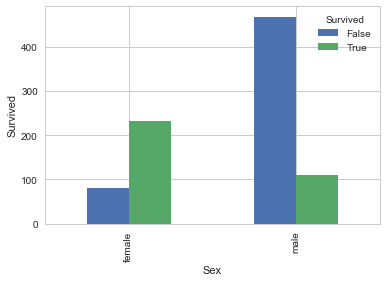

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# show plots in the notebook
%matplotlib inline


pd.crosstab(titanic.Sex, titanic.Survived.astype(bool)).plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Survived')




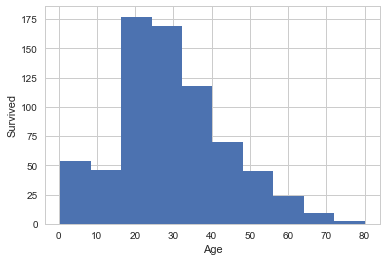

In [151]:
titanic.Age.hist()
plt.xlabel('Age')
plt.ylabel('Survived')


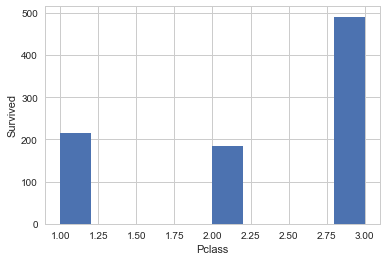

In [152]:
titanic.Pclass.hist()
plt.xlabel('Pclass')
plt.ylabel('Survived')


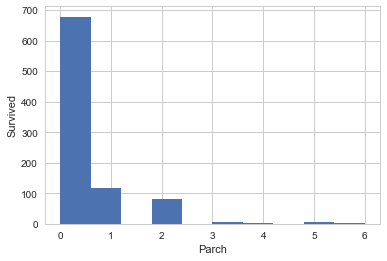

In [153]:
titanic.Parch.hist()
plt.xlabel('Parch')
plt.ylabel('Survived')



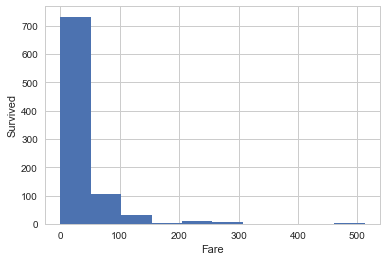

In [154]:
titanic.Fare.hist()
plt.xlabel('Fare')
plt.ylabel('Survived')


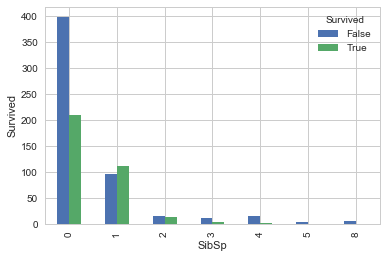

In [155]:
pd.crosstab(titanic.SibSp, titanic.Survived.astype(bool)).plot(kind='bar')
plt.xlabel('SibSp')
plt.ylabel('Survived')
plt.show()

In [101]:
titanic_data = pd.get_dummies(data= titanic, columns=['Sex'])
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [102]:
DT = DecisionTreeClassifier()

In [108]:
X = titanic_data[['Pclass','Sex_female','Sex_male', 'Age', 'SibSp', 'Parch', 'Fare']]
Y = titanic_data.Survived

In [109]:
titanic_data.fillna('0', inplace=True)

In [110]:
DT.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [111]:
Y_pred = DT.predict(X)

In [112]:
Y_pred[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
accuracy_score(Y, Y_pred)

0.98204264870931535

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state =30)

In [116]:
DT.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [117]:
pred_DT_train = DT.predict(X_train)
pred_DT_test = DT.predict(X_test)

In [118]:
pred_DT_test[:5]

array([1, 1, 0, 1, 1], dtype=int64)

In [119]:
print(accuracy_score(Y_train, pred_DT_train))
print(accuracy_score(Y_test, pred_DT_test))

0.991974317817
0.783582089552


In [120]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [121]:
pred_LR_train = LR.predict(X_train)
pred_LR_test = LR.predict(X_test)

In [122]:
print(accuracy_score(Y_train, pred_LR_train))
print(accuracy_score(Y_test, pred_LR_test))

0.796147672552
0.783582089552


In [123]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, pred_DT_test))
print('**************************************')
print(confusion_matrix(Y_test, pred_LR_test))

[[130  30]
 [ 28  80]]
**************************************
[[140  20]
 [ 38  70]]


In [124]:
print("Report with Decision Tree")
print(classification_report(Y_test, pred_DT_test))
print("******************************************")
print("Report with Logistic Regrssion")
print(classification_report(Y_test, pred_LR_test))

Report with Decision Tree
             precision    recall  f1-score   support

          0       0.82      0.81      0.82       160
          1       0.73      0.74      0.73       108

avg / total       0.78      0.78      0.78       268

******************************************
Report with Logistic Regrssion
             precision    recall  f1-score   support

          0       0.79      0.88      0.83       160
          1       0.78      0.65      0.71       108

avg / total       0.78      0.78      0.78       268



In [125]:
pd.crosstab(Y_test, pred_DT_test)

col_0,0,1
Survived,,
0,130,30
1,28,80


In [156]:
# Applying crcoss-validation on the entire datasets.
from sklearn.cross_validation import cross_val_score

In [157]:
scores = cross_val_score(estimator= DT, # Model to test
                         X= X, y = Y, # Target variable 
                         scoring = "accuracy", # Scoring metric
                         cv=10) # Cross validation folds
print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.68888889  0.72222222  0.74157303  0.79775281  0.83146067  0.82022472
  0.79775281  0.76404494  0.84269663  0.81818182]
Average accuracy:  0.782479854727


#### Conclusion:
    1. Displaying histogram with columns - Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard),
        and Fare
    2. Done the dummification of the attributes Sex to have binary values.
    3. Created the DecisionTree classifier and fitted against the X & Y where X contains the 
        features - Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard),
        and Fare and predicted the survivors.
    4. Then splitted the train & test data & predicted the survivors using Decision Tree model.
        The accuracy_score came out to be 99.1% for train data & 78.35% for test data.
    5. Then we tried out the Logistic Regression model and the accuracy if 79.6% for train 
        & 78.35% for test data.
    6. Since the result are overfitted with Decision Tree model hence we are implementing
        cross-validation on entire datasets and calculated the accuracy_score which is 
        78.5%.
    
    